## Q2: Logistic Regression (Classification Task)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### (a) Loading the dataset (Iris dataset)

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### (b) Pre-processing 

In [4]:
X = df.drop('Species',axis = 1)
y = df['Species']

# label encoding the target
y = LabelEncoder().fit_transform(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### (c) Model Training

In [7]:
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [8]:
print("\nCoefficients for each class:")
for cls, coef in zip(model.classes_, model.coef_):
    print(f"Class {cls}: {coef}")

print("\nIntercepts for each class:")
print(model.intercept_)


Coefficients for each class:
Class 0: [-1.21718543 -0.88935472  0.93727016 -1.50162047 -1.4010699 ]
Class 1: [-0.88990727  0.37978473 -0.37812062  0.10988778 -0.30606252]
Class 2: [ 2.1070927   0.50956999 -0.55914953  1.39173269  1.70713241]

Intercepts for each class:
[-0.18049275  2.09959687 -1.91910412]


### (d) Evaluation

In [9]:
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix :\n {cm}")

Confusion Matrix :
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [11]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1Score = f1_score(y_test,y_pred,average='weighted')
print("Classification Report\n")
print(f"Accuracy : {accuracy}\nPrecision : {precision}\nRecall : {recall}\nF1 Score : {f1Score}")


Classification Report

Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 Score : 1.0


### (e) Visualization

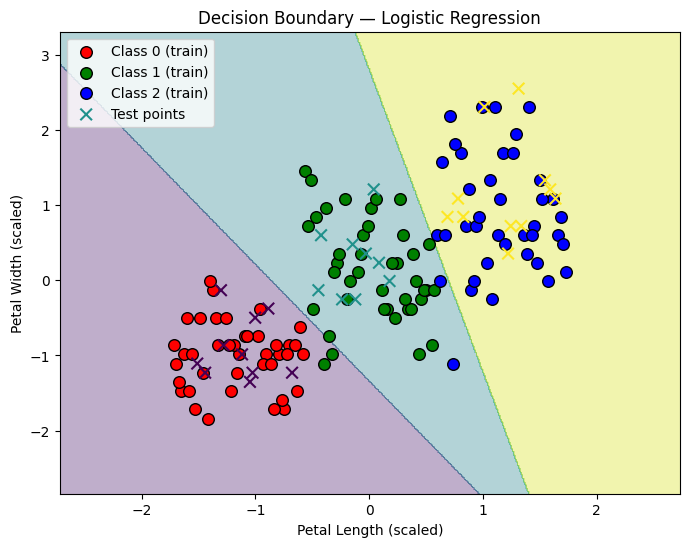

In [12]:
X_train_2 = X_train_scaled[:, :2]
X_test_2  = X_test_scaled[:, :2]

model_2 = LogisticRegression()
model_2.fit(X_train_2, y_train)


x_min, x_max = X_train_2[:, 0].min() - 1, X_train_2[:, 0].max() + 1
y_min, y_max = X_train_2[:, 1].min() - 1, X_train_2[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = model_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_bold = ['red', 'green', 'blue']

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.35)

for idx, cls in enumerate(np.unique(y_train)):
    plt.scatter(X_train_2[y_train == cls, 0],
                X_train_2[y_train == cls, 1],
                label=f"Class {cls} (train)",
                color=cmap_bold[idx], edgecolor='k', s=70)

plt.scatter(X_test_2[:, 0], X_test_2[:, 1],
            c=y_test, marker='x', s=70,
            label='Test points')

plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title("Decision Boundary — Logistic Regression")
plt.legend()
plt.show()